<img style="float: right;" width="120" src="https://neueda.conygre.com/pydata/bnpp-images/supplier-logo.png">
<br><br><br>

# Overview

**CIFAR-10** is a dataset that consists of several images divided into the following 10 classes:

- Airplanes
- Cars
- Birds
- Cats
- Deer
- Dogs
- Frogs
- Horses
- Ships
- Trucks

The dataset stands for the Canadian Institute For Advanced Research (CIFAR)

CIFAR-10 is widely used for machine learning and computer vision applications.

The dataset consists of 60,000 32x32 color images and 6,000 images of each class.

Images have low resolution (32x32).

Data Source: https://www.cs.toronto.edu/~kriz/cifar.html

# Import the python packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Import the data

In [2]:
from keras.datasets import cifar10

(X_train, y_train) , (X_test, y_test) = cifar10.load_data()


2022-03-28 02:27:23.468981: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-28 02:27:23.469028: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
display(X_train.shape)
display(y_train.shape)
display(X_test.shape)
display(y_test.shape)

(50000, 32, 32, 3)

(50000, 1)

(10000, 32, 32, 3)

(10000, 1)

# Explore the Data

## Single Image

[3]


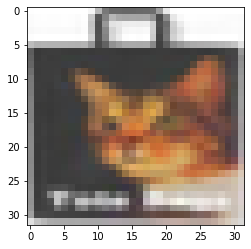

In [4]:
i = 3000
plt.imshow(X_train[i])
print(y_train[i])

## Image Grid

/home/trainer/.local/lib/python3.7/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


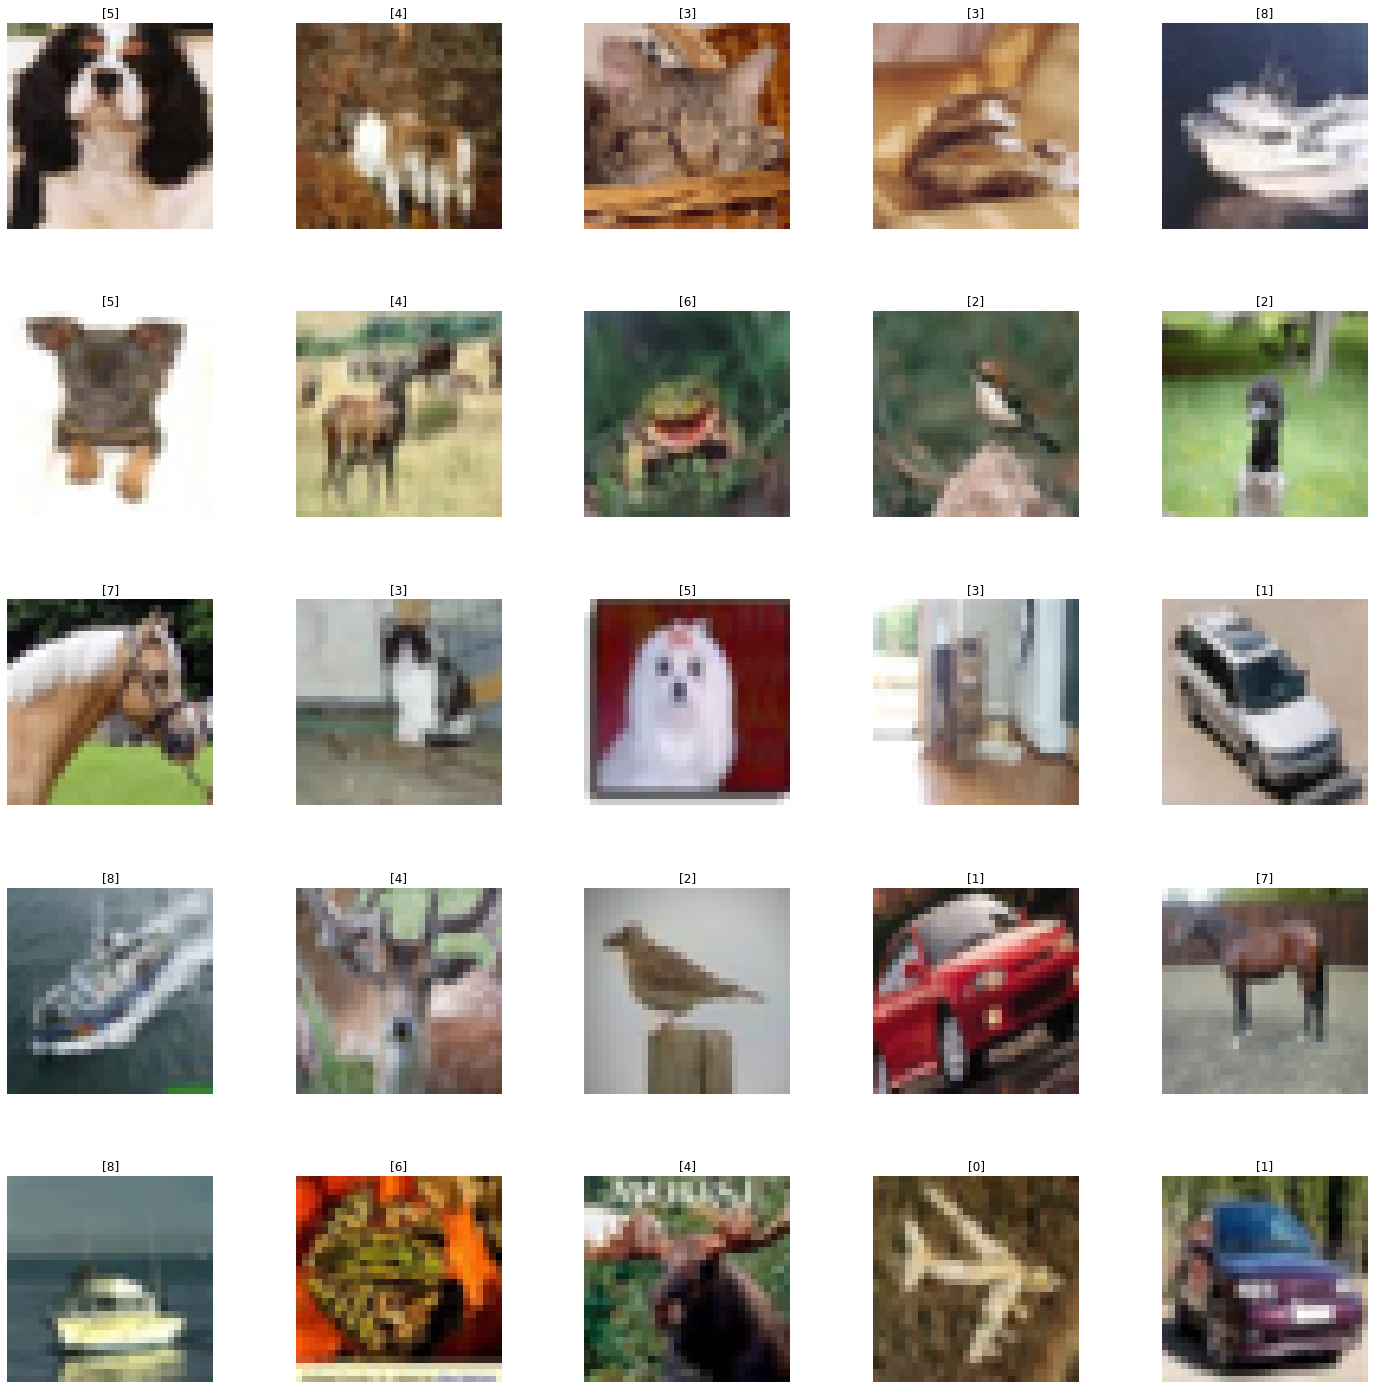

In [5]:
W_grid = 5
L_grid = 5

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

# Preprocess Data

## Convert training and independent variables to floating point

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

## Categorize predictions

In [7]:
from tensorflow import keras

number_cat = 10

### Training Predictions

Use Hot Encoding

In [8]:
# Before
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [9]:
# After
y_train = keras.utils.to_categorical(y_train, number_cat)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

### Test Predictions

In [10]:
# Before
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [11]:
# After
y_test = keras.utils.to_categorical(y_test, number_cat)
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

### Scale Test & Training


Change scale from 0 and 255 into a range between 0 and 1

In [12]:
X_train = X_train/255
X_test = X_test/255

In [13]:
X_train
X_train.shape

(50000, 32, 32, 3)

In [14]:
# Slice to get the dimensions of a single image
Input_shape = X_train.shape[1:]
Input_shape

(32, 32, 3)

# Train the model

## Import the packages

`keras.models`
> Sequential - build network in a sequential - left to right manner<BR>

`keras.layers`
> **Conv2D** - perform the convolution process<BR>
> **MaxPooling2D** - down sampling by choosing maximum <BR>
> **AveragePooling2D** - down sampling by choosing average <BR>
> **Dense** - Creates a fully connected NN <BR>
> **Flatten** - Flatten featrue maps to a single array of neurons<BR>
> **Dropout** - Regularization <BR>
    
`keras.optimizers`
> **Adam** - perform optimization, obtain weights on network
    
`keras.callbacks`
> **TensorBoard** - call into and out of Tensorflow


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

## Build the Network

In [16]:
cnn_model = Sequential()

# First Convolution Layer
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))

# Second ConvolutionLayer
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))

# Max Pooling layer
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

# Third Convolution Layer
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))

# Fourth  Convolution Layer
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))

# Average Pooling
cnn_model.add(AveragePooling2D(2,2))
cnn_model.add(Dropout(0.2))

# Flatten
cnn_model.add(Flatten())

# First ANN hidden layer
cnn_model.add(Dense(units = 1024, activation = 'relu'))

# Second ANN hidden layer
cnn_model.add(Dense(units = 1024, activation = 'relu'))

# Output Layer
cnn_model.add(Dense(units = 10, activation = 'softmax'))



2022-03-28 02:27:30.348313: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-28 02:27:30.348343: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-28 02:27:30.348365: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-172-31-13-234.ec2.internal): /proc/driver/nvidia/version does not exist
2022-03-28 02:27:30.348620: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Compile and Fit

In [17]:
cnn_model.compile(loss = 'categorical_crossentropy', 
                  optimizer = keras.optimizers.RMSprop(learning_rate = 0.001), 
                  metrics = ['accuracy'])


In [18]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 1, shuffle = True)

2022-03-28 02:27:31.069126: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 504s 322ms/step - loss: 1.5966 - accuracy: 0.4267


# Evaluate the model

In [19]:
evaluation = cnn_model.evaluate(X_test, y_test)

print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 20s 63ms/step - loss: 1.2886 - accuracy: 0.5664
Test Accuracy: 0.5663999915122986


In [20]:
# predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes = np.argmax(cnn_model.predict(X_test), axis=-1)

predicted_classes

array([3, 8, 8, ..., 5, 4, 7])

In [21]:
# turn binary vals back to decimal values
y_test = y_test.argmax(1)

y_test

array([3, 8, 8, ..., 5, 1, 7])

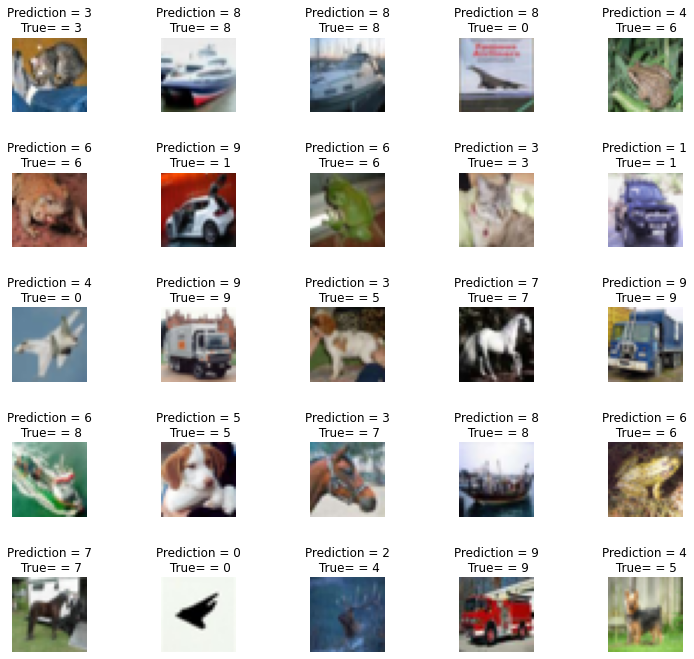

In [22]:
L = 5
W = 5

fig, axes = plt.subplots(L,W, figsize=(12,12))
axes = axes.ravel()
for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True= = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace = 1)    

# Add a confusion Matrix

<AxesSubplot:>

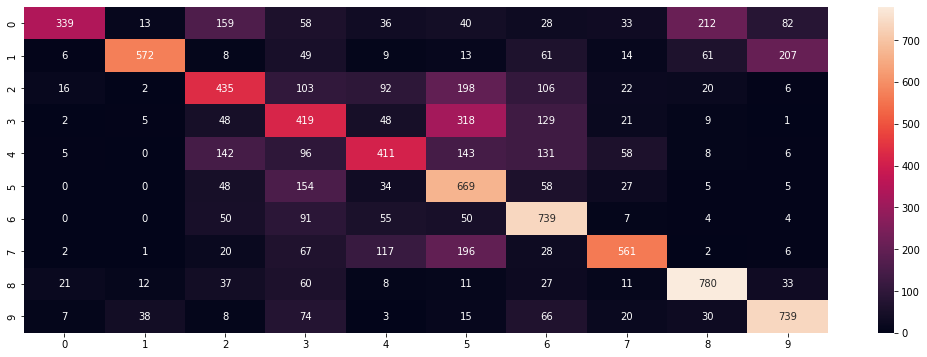

In [23]:
# Plot a confuson matrix
import seaborn as sns

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted_classes)

cm

plt.figure(figsize = (18, 6))
sns.heatmap(cm, annot=True, fmt="d")


# Save the Model

In [24]:
import os 
directory = os.path.join(os.getcwd(), 'Models')

if not os.path.isdir(directory):
    os.makedirs(directory)

# h5 is a popular format if serving with flask
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')

cnn_model.save(model_path)

# Save the Model for tensorflow serving

In [25]:
from tensorflow.keras.models import save_model

VERSION=1

save_model(
    cnn_model,
    'cifar_10/' + str(VERSION),
    overwrite=True,
    include_optimizer=True
)
# Create a compressed model from the savedmodel  .
# !tar -cz -f model.tar.gz --owner=0 --group=0 -C /tmp/1/ .

2022-03-28 02:36:37.928719: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: cifar_10/1/assets
